In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.optimize as scp 

In [2]:
#impotere data
#Opgaven blev af Carlos tolket som at det kun var påkrævet at lave databehandling på data ved 1.5 K og derfor har jeg ikke behandlet andet data. 
#18536-18538 = 1.5 K 
data36 = np.genfromtxt('018536', skip_header= 57)
data37 = np.genfromtxt('018537', skip_header= 57)
data38 = np.genfromtxt('018538', skip_header= 57)
data43 = np.genfromtxt('018543', skip_header= 57)
data44 = np.genfromtxt('018544', skip_header= 57)
data45 = np.genfromtxt('018545', skip_header= 57)


k_15 = np.append(data36[:,2], data37[:,2])
k_15 = np.append(k_15, data38[:,2])
k_15_count = np.append(data36[:,8],data37[:,8])
k_15_count = np.append(k_15_count, data38[:,8])
K_baggrund = np.append(data43[:,8],data44[:,8])
K_baggrund = np.append(K_baggrund, data45[:,8])



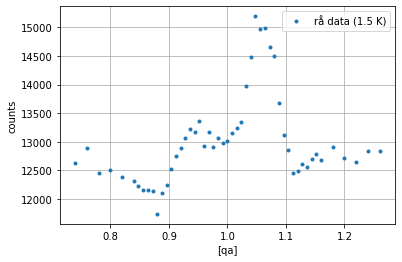

In [3]:
#plotning af rå data
plt.plot(k_15, k_15_count, "." , label= "rå data (1.5 K)")
plt.xlabel("[qa]")
plt.ylabel("counts")
plt.grid()
plt.legend()

In [4]:
#dataen rettes her for baggrundstråling og usikkerheden på den rettede data findes
k_15_rettet = k_15_count-K_baggrund
mu = (k_15_count+K_baggrund)**(1/2)

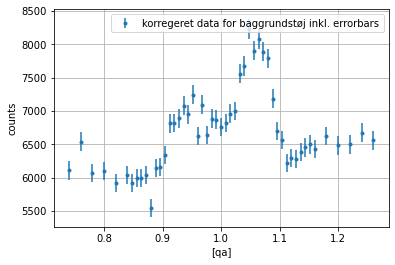

In [5]:
plt.errorbar(k_15, k_15_rettet, yerr = mu, fmt=".", label ="korregeret data for baggrundstøj inkl. errorbars")
plt.xlabel("[qa]")
plt.ylabel("counts")
plt.grid()
plt.legend()

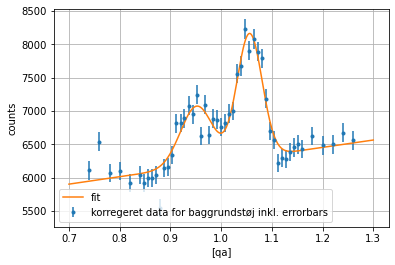

In [6]:
#Der fittes en dobbelt gauss funktion til data med en linæer baggrund

def gaussian(x, mu, A, sigma):
    return (A * np.exp( - ( ( x - mu ) **2 ) / ( (2 * sigma **2 ) ) ) )

def linear(x, a, b):
    return (a * x + b)

def fit_func(x, mu1, A1, sigma1, mu2, A2, sigma2, a, b):
    return gaussian(x, mu1, A1, sigma1) + gaussian(x, mu2, A2, sigma2) + linear(x, a, b)

guess = np.array([0.95, 1000, 0.01, 1.05, 1800, 0.01, 150, 6000])

X = np.linspace(0.7, 1.3, 1000)

plt.errorbar(k_15,k_15_rettet, yerr=mu, fmt='.',label = 'korregeret data for baggrundstøj inkl. errorbars')
plt.xlabel('[qa]')
plt.ylabel('counts')

par, cov = scp.curve_fit(fit_func, k_15, k_15_rettet, p0 = guess)

plt.plot(X, fit_func(X, *par), label ="fit")
plt.grid()
plt.legend()
